# Project 1 - Spotify Musicical Characteristic Analysis

### Divya Shetty, Vanessa Vasquez, Chris Blankenship

In [1]:
# Import Libraries
# Use "pip install seaborn" if not installed on device

import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
import random 
import scipy.stats as stats
import seaborn as sn
from scipy.stats import linregress

In [2]:
random.seed(42)

In [3]:
# Import clean data
file_path = "Output_data/spotify_clean.csv"

spotify_df = pd.read_csv(file_path, low_memory=False)

## View summary of cleaned data file

### "Let the data speak to you "
                                        - Jeff Anderson, UTSA Bootcamp

In [4]:
# Look at data frame summary
spotify_df.head()

,year,artists,acousticness,danceability,energy,instrumentalness,loudness,popularity,speechiness,valence
0,1920,Mamie Smith,0.991000,0.598,0.224,0.000522,-12.628,12,0.0936,0.6340
1,1920,Screamin Jay Hawkins,0.643000,0.852,0.517,0.026400,-7.261,7,0.0534,0.9500
2,1920,Mamie Smith,0.993000,0.647,0.186,0.000018,-12.098,4,0.1740,0.6890
3,1920,Oscar Velazquez,0.000173,0.730,0.798,0.801000,-7.311,17,0.0425,0.0422
4,1920,Mixe,0.295000,0.704,0.707,0.000246,-6.036,2,0.0768,0.2990


## Making sense of the data: Separate song releases by decade

In [5]:
# Create bins for decades
bins  = [1920,1929,1939,1949,1959,1969,1979,1989,1999,2009,2019,2030]
bin_group = ['1920-1929','1930-1939','1940-1949','1950-1959','1960-1969','1970-1979','1980-1989','1990-1999','2000-2009','2010-2019','2020 +']

# Sort df by bins
spotify_copy = spotify_df
spotify_copy['decade'] = pd.cut(spotify_copy['year'],bins,labels=bin_group,include_lowest=True)
spotify_copy = spotify_copy[['decade', 'artists', 'acousticness', 'danceability',
       'energy', 'instrumentalness', 'loudness', 'popularity', 'speechiness',
       'valence']]

# Get count of songs listed by decade and print
song_count = spotify_copy.groupby('decade')['artists'].count()
song_count

decade
1920-1929     5631
1930-1939    10760
1940-1949    15491
1950-1959    20000
1960-1969    19610
1970-1979    20108
1980-1989    20074
1990-1999    20328
2000-2009    13779
2010-2019    22441
2020 +        6132
Name: artists, dtype: int64

In [6]:
# Generate a grouped dataframe to show average music characteristics
spotify_line = spotify_copy[['decade','acousticness','danceability','energy','instrumentalness','speechiness','valence']]
song_line = spotify_line.groupby('decade').mean()

# Generate a line chart showing music characteristics change over decades
x_labels = ['1920s','1930s','1940s','1950s','1960s','1970s','1980s','1990s','2000s','2010s','2020+']

#x_axis = x_labels
y_labels = ['acousticness','danceability','energy','instrumentalness','speechiness','valence']
y_line = song_line[['acousticness','danceability','energy','instrumentalness','speechiness','valence']]

## Create visualization to view the data:
### 1) Song releases by decade in bar graph format
### 2) The different musical characteristics plotted by decade via line graph

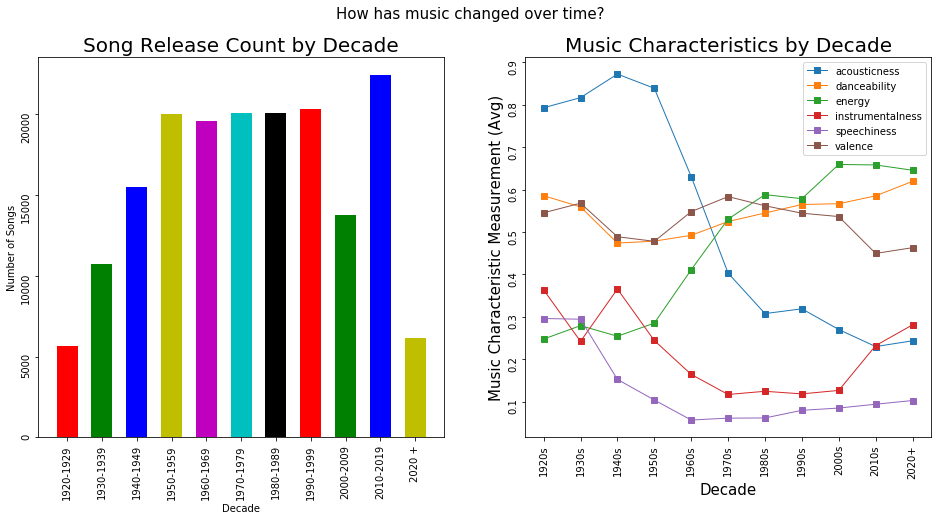

In [7]:
# Generate a bar plot showing total songs released by decade

x_axis = song_count.index
y_axis = song_count

fig, (ax1, ax2) = plt.subplots(1, 2)
fig.set_figheight(7)
fig.set_figwidth(16)

fig.suptitle('How has music changed over time?', fontsize=15)

ax1.bar(x_axis, y_axis,width=.6,color=['r', 'g', 'b', 'y', 'm', 'c', 'k'] )
ax1.set_title('Song Release Count by Decade',fontsize=20)
ax1.set_ylabel('Number of Songs')
ax1.set_xlabel('Decade')
ax1.tick_params(labelrotation=90)

#Subplot 2

ax2.plot(x_labels, y_line, marker='s',linewidth=1)
ax2.set_title('Music Characteristics by Decade',fontsize=20)
ax2.set_ylabel('Music Characteristic Measurement (Avg)',fontsize=15)
ax2.set_xlabel('Decade',fontsize=15)
ax2.legend(y_labels,loc ='upper right')
ax2.tick_params(labelrotation=90)
plt.savefig("Images/music_change_over_time")
plt.show()

##  Question 1 : Does the decade of song release affect the total count of songs produced in that time period?

### Null Hypothesis - There is no statistically meaningful relationship between the decade of song release vs. the total count of songs released during each time period.
### Alternative Hypothesis - There is a statistically measurable correlation between the decade of song release vs. count of songs released in any given time period.

In [8]:
# Remove the decade 2020+ since it has not covered a full decade and print the result to verify it's been dropped

song_count = pd.DataFrame(song_count[:-1])
song_count

,artists
decade,
1920-1929,5631
1930-1939,10760
1940-1949,15491
1950-1959,20000
1960-1969,19610
1970-1979,20108
1980-1989,20074
1990-1999,20328
2000-2009,13779


In [9]:
# Find the average release by dividing total songs released by the number of decades measured

expected = int(song_count.sum()/song_count.count())

In [10]:
# Insert the average or "expected" song count as a column and rename the count to "releases"

song_count['Expected'] = expected
song_count.columns= ["Releases" , 'Expected']
song_count

,Releases,Expected
decade,,
1920-1929,5631,16822
1930-1939,10760,16822
1940-1949,15491,16822
1950-1959,20000,16822
1960-1969,19610,16822
1970-1979,20108,16822
1980-1989,20074,16822
1990-1999,20328,16822
2000-2009,13779,16822


## Use chi square test to measure categorical data sorted by decade

In [11]:
# The degree of freedom is 10-1 = 9
# With a p-value of 0.05, the confidence level is 1.00-0.05 = 0.95.
critical_value = stats.chi2.ppf(q = 0.95, df = 9)
critical_value

16.918977604620448

In [12]:
# Run the chi square test with stats.chisquare()
stats.chisquare(song_count['Releases'], song_count['Expected'])

Power_divergenceResult(statistic=15225.82689335394, pvalue=0.0)

## Results from Question 1:

### 1) Since the chi-square value of 15,225.82 at a confidence level of 95% exceeds the critical value of 16.91, we conclude that the differences of number of records relased per decade is statistically significant

### ----------------------------------------------------------------------------------------------------------------------------------

# Continuing to sift through the data: How has Rolling Stones Music Style Evolved Over Time?


In [26]:
# Create data frame sorted by the artist, The Rolling Stones, and print the result
spotify_stones = spotify_copy[spotify_copy['artists']=='The Rolling Stones']
spotify_stones.head()

,decade,artists,acousticness,danceability,energy,instrumentalness,loudness,popularity,speechiness,valence
8839,1960-1969,The Rolling Stones,0.0239,0.603,0.689,0.000003,-10.729,46,0.0304,0.7610
8868,1960-1969,The Rolling Stones,0.0383,0.723,0.863,0.031700,-7.890,77,0.0338,0.9310
8954,1960-1969,The Rolling Stones,0.1780,0.578,0.429,0.000060,-9.601,55,0.0268,0.0889
8964,1960-1969,The Rolling Stones,0.0289,0.579,0.877,0.571000,-8.830,54,0.0488,0.9000
8974,1960-1969,The Rolling Stones,0.2910,0.508,0.645,0.000003,-9.012,53,0.0395,0.4120


In [14]:
# Generate a grouped dataframe to show average music characteristics
stones_count = spotify_stones.groupby('decade')['artists'].count()
stones_values = stones_count.values[4:]
stones_index = stones_count.index[4:] 

x_axis = stones_index
y_axis = stones_values
# Generate a grouped dataframe to show average music characteristics

stones_line = spotify_stones[['decade','acousticness','danceability','energy','instrumentalness','speechiness','valence']]
stones_line = stones_line.groupby('decade').mean()
stones_line = stones_line.dropna()
x_values = stones_line.index
y_values = stones_line.values


## Create Visualization for the Rolling Stones Data
### 1) Bar chart of Rolling Stones song releases by decade
### 2) Line chart plotting individual characteristics of Rolling Stones Music by decade

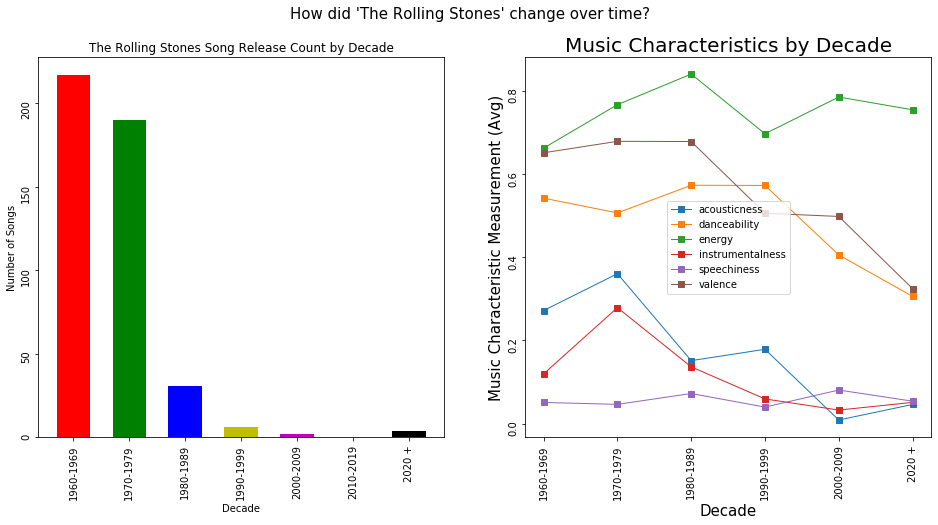

<Figure size 432x288 with 0 Axes>

In [15]:
# Plotting Number of Releases

fig, (ax3, ax4) = plt.subplots(1, 2)
fig.set_figheight(7)
fig.set_figwidth(16)

fig.suptitle("How did 'The Rolling Stones' change over time?", fontsize=15)

ax3.bar(x_axis, y_axis,width=.6,color=['r', 'g', 'b', 'y', 'm', 'c', 'k'] )
ax3.set_title('The Rolling Stones Song Release Count by Decade')
ax3.set_ylabel('Number of Songs')
ax3.set_xlabel('Decade')
ax3.tick_params(labelrotation=90)

# Generate a line chart showing music characteristics change over decades
x_labels = ['1960s','1970s','1980s','1990s','2000s','2010s','2020+']
y_labels = ['acousticness','danceability','energy','instrumentalness','speechiness','valence']

ax4.plot(x_values, y_values, marker='s',linewidth=1)
ax4.set_title('Music Characteristics by Decade',fontsize=20)
ax4.set_ylabel('Music Characteristic Measurement (Avg)',fontsize=15)
ax4.set_xlabel('Decade',fontsize=15)
ax4.legend(y_labels,loc ='center')
ax4.tick_params(labelrotation=90)

plt.savefig("Images/Stones_music_change_over_time")
plt.show()
plt.tight_layout()

### Use correlation matrix to look for possible questions related to the Rolling Stones music characteristics


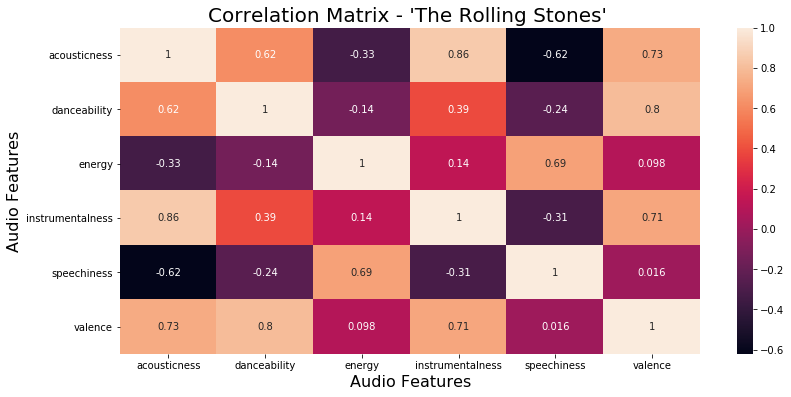

<Figure size 432x288 with 0 Axes>

In [16]:
# create  a correlation matrix
cormatrix = stones_line.corr()
plt.figure(figsize=(13,6))
sn.heatmap(cormatrix, annot=True)
plt.title("Correlation Matrix - 'The Rolling Stones' ",fontsize=20 , color = 'k')
plt.xlabel('Audio Features',fontsize=16 )
plt.ylabel('Audio Features',fontsize=16 )
plt.savefig("Images/Corr_matrix_stones")
plt.show()
plt.tight_layout()

## Question 2: Is there a correlation between the "Speechiness" and "Energy" of Rolling Stones songs over time?  

### Null hypothesis - There is no correlation between levels of speechiness vs energy in Rolling Stones songs.

### Alternative hypothesis - There is a correlction between levels of speechiness vs energy in Rolling Stones songs - they travel similar paths.

In [17]:
#Fetch speechiness values
Stones_speechiness = stones_line.speechiness
# Fetch energy values
Stones_energy = stones_line.energy

### Plot a regression analysis of speechiness vs. energy in Rolling Stones songs

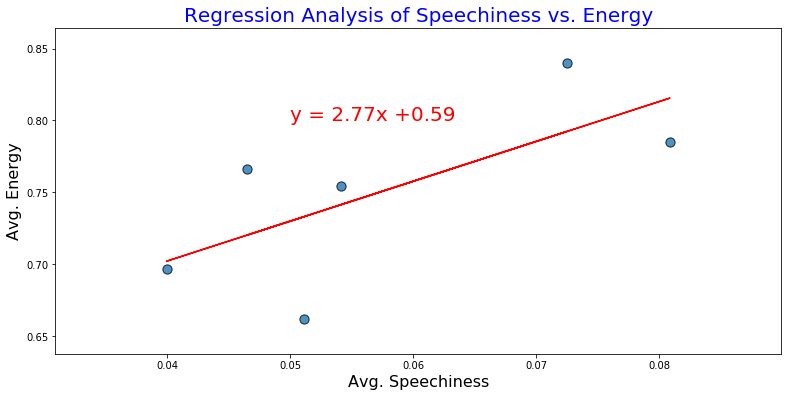

<Figure size 432x288 with 0 Axes>

In [18]:
# Create regression plot of Rolling Stones data
x_axis = Stones_speechiness
y_axis = Stones_energy
(slope, intercept, rvalue, pvalue, stderr) = linregress(x_axis, y_axis)
regress_values = x_axis * slope + intercept
line_eq = "y = " + str(round(slope,2)) + "x +" + str(round(intercept,2))
plt.figure(figsize=(13,6))
plt.scatter(x_axis,y_axis,alpha=.8, s=85, edgecolor="black")
plt.plot(x_axis,regress_values,'r-')
plt.annotate(line_eq,xy=(0.05,0.8),color='red',fontsize=20)
plt.title('Regression Analysis of Speechiness vs. Energy',fontsize=20 , color = 'b')
plt.xlabel('Avg. Speechiness',fontsize=16 )
plt.ylabel('Avg. Energy',fontsize=16 )

plt.savefig("Images/Energy_Speechiness_Stones")
plt.show()
plt.tight_layout()

In [19]:
# Print the r and p values resulting from regression analysis
print(f"The r-value is: {round(rvalue**2,2)}")
print(f"The p-value is: {round(pvalue**2,2)}")

The r-value is: 0.48
The p-value is: 0.02


## Results for Question 2:

### 1) Regression shows a positive correlation between the two musical characteristics of Rolling Stones songs - speechiness and energy.

### 2) R value 0.65 shows that 65% of data is accounted for and there is a moderate correlation between the two.

### 3) with P-value 0.00 we would reject our hypothesis that two characteristics are not correlated. This means the two patterns are likely to travel together in Rolling Stones music.

### If speechiness and energy are related in Rolling Stones songs, is the same pattern true of all songs in the data?
 ### -------------------------------------------------------------------------------------------------------------------------------

## Question 3 : Are energy and speechiness patterns in music correlated when looking at all songs released?

### Null hypothesis - There is no correlation between levels of speechiness vs energy in all songs.

### Alternative hypothesis - There is a correlction between levels of speechiness vs energy in all songs - they travel similar paths.

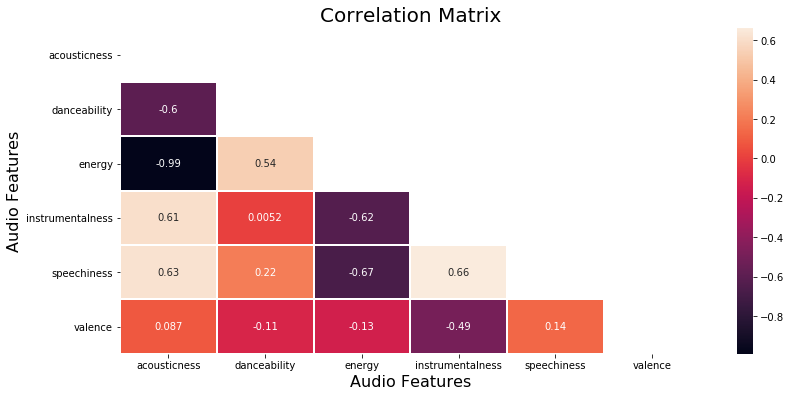

<Figure size 432x288 with 0 Axes>

In [20]:
#Prepare correlation matrix of all songs
matrix = np.triu(song_line.corr())
corrMatrix = song_line.corr()
plt.figure(figsize=(13,6))
sn.heatmap(corrMatrix, annot=True , mask=matrix ,linewidths=1)
plt.title("Correlation Matrix",fontsize=20 , color = 'k')
plt.xlabel('Audio Features',fontsize=16 )
plt.ylabel('Audio Features',fontsize=16 )
plt.savefig("Images/Corr_matrix_original")
plt.show()
plt.tight_layout()

In [21]:
# Create variables to hold music patterns speechiness and energy
spotify_speechiness = song_line.speechiness
spotify_energy = song_line.energy


### Plot a regression analysis of speechiness vs. energy in all songs

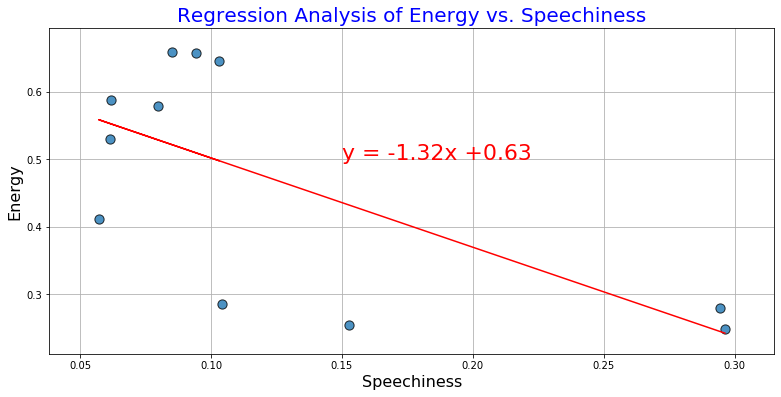

<Figure size 432x288 with 0 Axes>

In [22]:
# Create regression plot and analysis of music patterns for all songs
x_axis = spotify_speechiness
y_axis = spotify_energy
(slope, intercept, rvalue, pvalue, stderr) = linregress(x_axis, y_axis)
regress_values = x_axis * slope + intercept
line_eq = "y = " + str(round(slope,2)) + "x +" + str(round(intercept,2))
plt.figure(figsize=(13,6))
plt.scatter(x_axis,y_axis , alpha=.8, s=85, edgecolor="black")
plt.plot(x_axis,regress_values,'r-')
plt.annotate(line_eq,xy=(0.15,0.5),color='red',fontsize=22)
plt.title('Regression Analysis of Energy vs. Speechiness',fontsize=20 , color = 'b')
plt.xlabel('Speechiness',fontsize = 16,color = 'k')
plt.ylabel('Energy',fontsize = 16,color = 'k')
plt.grid()
#Save as png file
plt.savefig("Images/EnergyVsSpeechiness_original")


plt.show()
plt.tight_layout()

In [23]:
#Print the r and p value results from regression analysis
print(f"The r-value is: {round(rvalue**2,2)}")
print(f"The p-value is: {round(pvalue**2,2)}")
rvalue

The r-value is: 0.45
The p-value is: 0.0


-0.6690808372409175

## Results for Question 3:

### 1) p value 0 shows that there is a statistically significant relationship between the two features
### 2) r value 0.45 shows that 45% of the data is acocunted for and there is a moderate relationship between the two variables.
### 3) In our measure of all music releases, as Energy increases Speechiness decreases.  This is the exact opposite pattern we saw in our previous measure of Rolling Stones songs only